### Imports et chargement des données

In [1]:
#imports
import numba
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import random
from tqdm import tqdm
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from PIL import Image
from plotly import tools
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly
from sklearn.model_selection import train_test_split
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

trainX, trainY, testX, testY = load_dataset()

In [3]:
# preprocess pixels
def preprocess_pixels(trainX, testX):
    # convert from integers to floats
    trainX_norm = trainX.astype('float32')
    testX_norm = testX.astype('float32')
    # normalize to range 0-1
    trainX_norm = trainX_norm / 255.0
    testX_norm = testX_norm / 255.0
    # return normalized images
    return trainX_norm, testX_norm

trainX, testX = preprocess_pixels(trainX, testX)
print("trainX shape ", trainX.shape, "testX shape ", testX.shape)

trainX shape  (60000, 28, 28, 1) testX shape  (10000, 28, 28, 1)


### Recapitulatif des tests menés

In [4]:
#idee autres encoders / decoders


#test 0 latent dim = 2, avec des couches Dense(64,32,16)


#         #create encoder
#         self.encoder = keras.models.Sequential(
#             [
#                 keras.layers.Flatten(),
#                 keras.layers.Dense(64, activation=keras.activations.tanh),
#                 keras.layers.Dense(32, activation=keras.activations.tanh),
#                 keras.layers.Dense(16, activation=keras.activations.tanh),
#                 keras.layers.Dense(2, activation=keras.activations.tanh)    
#             ]
#         )
        

        
#         #ceate decoder
#         self.decoder = keras.models.Sequential(
#                     [
#                         keras.layers.Flatten(),
#                         keras.layers.Dense(16, activation=keras.activations.tanh),
#                         keras.layers.Dense(32, activation=keras.activations.tanh),
#                         keras.layers.Dense(64, activation=keras.activations.tanh),
#                         keras.layers.Dense(784, activation=keras.activations.sigmoid),
#                         keras.layers.Reshape((28,28))
#                     ]
#         )


#test 1, couches Dense avec relu partout pour les activations sauf sigmoid à la fin pour la dernière decode
# latent dim à 2

#         #create encoder
#         self.encoder = keras.models.Sequential(
#             [
#                 keras.layers.Flatten(),
#                 keras.layers.Dense(64, activation=keras.activations.relu),
#                 keras.layers.Dense(32, activation=keras.activations.relu),
#                 keras.layers.Dense(16, activation=keras.activations.relu),
#                 keras.layers.Dense(self.latent_dim, activation=keras.activations.relu)    
#             ]
#         )
        

        
#         #ceate decoder
#         self.decoder = keras.models.Sequential(
#                     [
#                         keras.layers.Flatten(),
#                         keras.layers.Dense(16, activation=keras.activations.relu),
#                         keras.layers.Dense(32, activation=keras.activations.relu),
#                         keras.layers.Dense(64, activation=keras.activations.relu),
#                         keras.layers.Dense(784, activation=keras.activations.sigmoid),
#                         keras.layers.Reshape((28,28))
#                     ]
#         )


#test 2 = identique mais avec latent_dim à 4

#test 3 = identique mais avec latent_dim à 8

#test 4 = autres couches Dense (256, 128, 64) avec un latent_dim à 32

#         #create encoder
#         self.encoder = keras.models.Sequential(
#             [
#                 keras.layers.Flatten(),
#                 keras.layers.Dense(256, activation=keras.activations.relu),
#                 keras.layers.Dense(128, activation=keras.activations.relu),
#                 keras.layers.Dense(64, activation=keras.activations.relu),
#                 keras.layers.Dense(self.latent_dim, activation=keras.activations.relu)    
#             ]
#         )
        

        
#         #ceate decoder
#         self.decoder = keras.models.Sequential(
#                     [
#                         keras.layers.Flatten(),
#                         keras.layers.Dense(64, activation=keras.activations.relu),
#                         keras.layers.Dense(128, activation=keras.activations.relu),
#                         keras.layers.Dense(256, activation=keras.activations.relu),
#                         keras.layers.Dense(784, activation=keras.activations.sigmoid),
#                         keras.layers.Reshape((28,28))
#                     ]
#         )

#test 5, couches de convolution (8,8,16), binary crossentropy et latent_dim à 8 ==> Très bons résultats
#         #create encoder
#         self.encoder = keras.models.Sequential(
#             [
#                 keras.layers.Input(shape=(28, 28, 1)),
#                 keras.layers.Conv2D(16, (3,3), activation=keras.activations.relu, padding="same"),
#                 keras.layers.MaxPool2D((2,2), padding="same"),
#                 keras.layers.Conv2D(8, (3,3), activation=keras.activations.relu, padding="same"),
#                 keras.layers.MaxPool2D((2,2), padding="same"),
#                 keras.layers.Conv2D(self.latent_dim, (3,3), activation=keras.activations.relu, padding="same"),
#                 keras.layers.MaxPool2D((2,2), padding="same")
#                 #we should have 4 x 4 x 8 output if latent_dim = 8
#             ]
#         )
        

        
#         #ceate decoder
#         self.decoder = keras.models.Sequential(
#                     [
#                         keras.layers.Conv2D(self.latent_dim, (3,3), activation=keras.activations.relu, padding="same"),
#                         keras.layers.UpSampling2D((2,2)),
#                         keras.layers.Conv2D(8, (3,3), activation=keras.activations.relu, padding="same"),
#                         keras.layers.UpSampling2D((2,2)),
#                         keras.layers.Conv2D(16, (3, 3), activation=keras.activations.relu),
#                         keras.layers.UpSampling2D((2,2)),
#                         keras.layers.Conv2D(1, (3, 3), activation=keras.activations.sigmoid, padding='same')
#                     ]
#         )


In [5]:
print("trainX shape ", trainX.shape)
print("trainY shape ", trainY.shape)

trainX shape  (60000, 28, 28, 1)
trainY shape  (60000, 10)


### Création de la classe "MyAutoEncoder"

In [6]:
#create the custom AutoEncoder class
class MyAutoEncoder:
    def __init__(self, img_width = 28, img_height = 28, img_depth = 1, latent_dim = 2):
        self.img_width = img_width
        self.img_height = img_height
        self.img_depth = img_depth
        self.img_dim = self.img_width * self.img_height * self.img_depth
        self.latent_dim = latent_dim # The dimension of the data embedding
        
        
        #create encoder
        self.encoder = keras.models.Sequential(
            [
                keras.layers.Flatten(),
                keras.layers.Dense(64, activation=keras.activations.relu),
                keras.layers.Dense(32, activation=keras.activations.relu),
                keras.layers.Dense(16, activation=keras.activations.relu),
                keras.layers.Dense(self.latent_dim, activation=keras.activations.relu)    
            ]
        )
        

        
        #ceate decoder
        self.decoder = keras.models.Sequential(
                    [
                        keras.layers.Flatten(),
                        keras.layers.Dense(16, activation=keras.activations.relu),
                        keras.layers.Dense(32, activation=keras.activations.relu),
                        keras.layers.Dense(64, activation=keras.activations.relu),
                        keras.layers.Dense(784, activation=keras.activations.sigmoid),
                        keras.layers.Reshape((28,28))
                    ]
        )
        
        #create autoencoder
        self.autoencoder = keras.models.Sequential(
            [
                self.encoder, self.decoder
            ]
        )
        
        self.autoencoder.compile(loss=keras.losses.mse)
        
        #self.autoencoder.summary()

    
    def fit(self, X, testX, n_epochs=200, n_batch_size=64):
        #compile autoencoder
        #self.autoencoder.compile(loss=keras.losses.mse)
        history = self.autoencoder.fit(X, X, epochs=n_epochs, batch_size=n_batch_size,
                validation_data=(testX, testX))
        
        return history

    
    def plotLoss(self, model):
        
        def trace(x,y,imagesLabels,color):
            trace = go.Scatter(
                x = x,y = y,
                name=imagesLabels,
                marker=dict(color=color),
                mode = "markers+lines",
                text=x
            )
            return trace

        #hist = model
        hist = model.history
        loss = hist['loss']
        valLoss = hist['val_loss']

        epochs = list(range(1,len(loss)+1))

        traceL = trace(epochs,loss,"Training loss", "Blue")
        traceVl = trace(epochs,valLoss,"Validation loss", "Magenta")

        fig = plotly.subplots.make_subplots(rows=1,cols=1, subplot_titles=('Training and validation loss'))
        fig.append_trace(traceL,1,1)
        fig.append_trace(traceVl,1,1)
        fig['layout']['xaxis'].update(title = 'Epoch')
        fig['layout']['yaxis'].update(title = 'Loss', range=[0,0.3])


        iplot(fig, filename='loss')

### Verification des sorties de l'auto encoder, de l'encoder et du decoder (fixer latent_dim)

In [7]:
##### test auto encoder
lat_dim = 2
my_autoencoder = MyAutoEncoder(img_width = 28, img_height = 28, img_depth = 1, latent_dim = lat_dim)
# my_autoencoder.fit(trainX, 5, 200)
print("Auto encoder predict shape")
print(my_autoencoder.autoencoder.predict(tf.zeros((10,28,28, 1))).shape)
print("encoder predict shape")
print(my_autoencoder.encoder.predict(tf.zeros((10,28,28, 1))).shape)
print("decoder predict shape")
#for Dense layers
print(my_autoencoder.decoder.predict(tf.zeros((1, lat_dim))).shape)
#for conv layers (here 2 poolings)
#print(my_autoencoder.decoder.predict(tf.zeros((1,7, 7, lat_dim))).shape)

Auto encoder predict shape
(10, 28, 28)
encoder predict shape
(10, 2)
decoder predict shape
(1, 28, 28)


### Entrainement de l'auto encoder

In [8]:
#fit auto encoder
history = my_autoencoder.fit(trainX, testX, 40, 200)

Epoch 1/40
300/300 [==============================] - 3s 9ms/step - loss: 0.0858 - val_loss: 0.0617
Epoch 2/40
300/300 [==============================] - 2s 8ms/step - loss: 0.0609 - val_loss: 0.0595
Epoch 3/40
300/300 [==============================] - 2s 8ms/step - loss: 0.0591 - val_loss: 0.0581
Epoch 4/40
300/300 [==============================] - 2s 8ms/step - loss: 0.0578 - val_loss: 0.0569
Epoch 5/40
300/300 [==============================] - 2s 8ms/step - loss: 0.0568 - val_loss: 0.0563
Epoch 6/40
300/300 [==============================] - 2s 8ms/step - loss: 0.0562 - val_loss: 0.0559
Epoch 7/40
300/300 [==============================] - 2s 8ms/step - loss: 0.0556 - val_loss: 0.0554
Epoch 8/40
300/300 [==============================] - 2s 7ms/step - loss: 0.0553 - val_loss: 0.0551
Epoch 9/40
300/300 [==============================] - 2s 8ms/step - loss: 0.0545 - val_loss: 0.0509
Epoch 10/40
300/300 [==============================] - 2s 7ms/step - loss: 0.0506 - val_loss: 0.0483

In [9]:
#plot loss evolution
my_autoencoder.plotLoss(history)

### Affichage des données après compression

In [10]:
#compress trainX
compress_trainX = my_autoencoder.encoder.predict(trainX)
print("compress trainX 0 shape : ", compress_trainX[0].shape)

compress trainX 0 shape :  (2,)


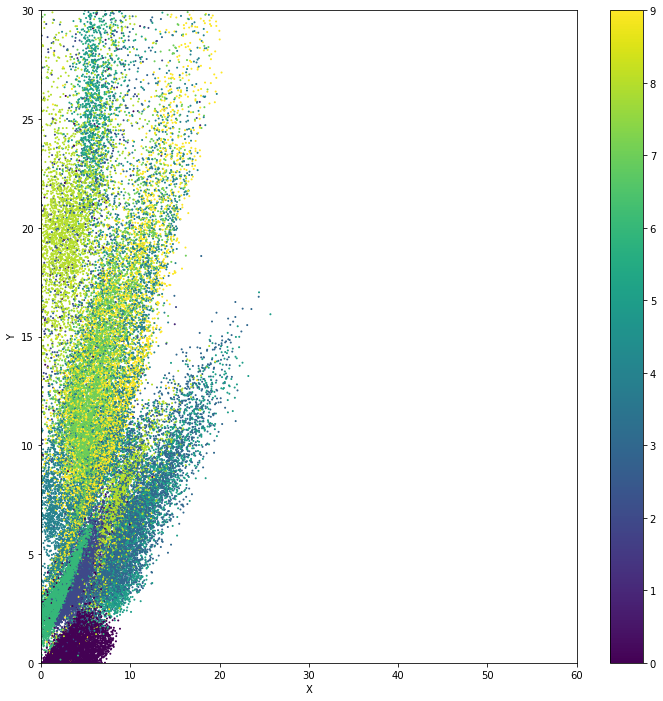

In [11]:
if lat_dim == 2:
    plot_compress_trainX = np.array(compress_trainX)
    plt.figure(figsize=(12, 12))
    plt.scatter(plot_compress_trainX[:, 0], plot_compress_trainX[:, 1], c=np.argmax(trainY, axis=1), s=1)
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, 60)
    plt.ylim(0, 30)

### Génération de nouvelles images

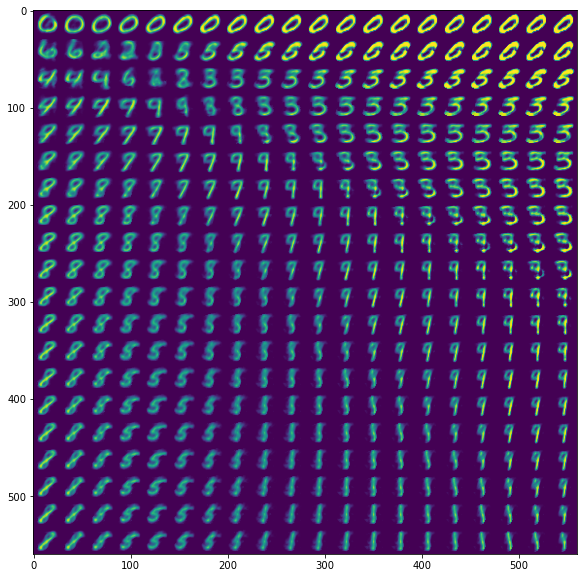

In [12]:
if lat_dim == 2:
    figure_size = 20  # figure with 20 x 20 digits
    digit_size = 28
    #prepare the figure
    figure = np.zeros((digit_size * figure_size, digit_size * figure_size))
    #take figure_size points in range [0, 35] standard deviations for x and [0, 20] for y
    grid_x = np.linspace(0, 50, figure_size)
    grid_y = np.linspace(0, 25, figure_size)

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z_sample = np.array([[xi, yi]])
            x_decoded = my_autoencoder.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    plt.imshow(figure)
    plt.show()

### Affichage des images originales et des images traitées par l'auto encoder (compress / decompress)

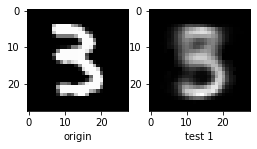

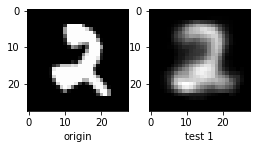

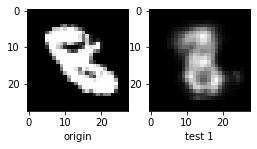

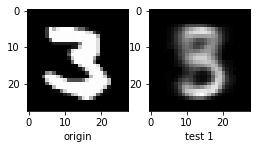

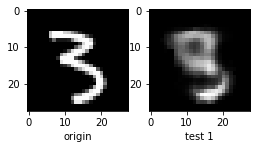

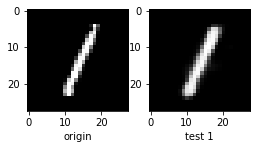

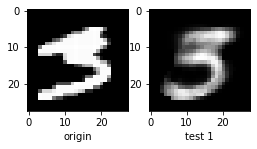

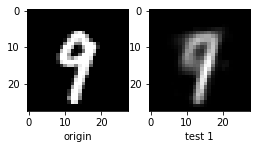

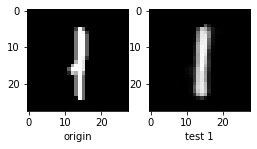

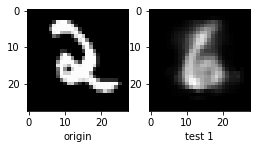

In [13]:
#plot 10 groups of samples for our test
for i in range(10):
    fig=plt.figure(figsize=(4, 4))
    columns = 2
    rows = 1
    
    r = random.randint(0, len(testX))

    fig.add_subplot(rows, columns, 1) 
    plt.imshow(testX[r].squeeze(2), cmap="gray") # image orginal
    plt.xlabel("origin")

    fig.add_subplot(rows, columns, 2)
    test_1_img = my_autoencoder.autoencoder.predict(np.expand_dims(testX[r], axis=0))
    plt.imshow(test_1_img[0], cmap="gray")
    plt.xlabel("test 1")


plt.show()